## imports

In [15]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import keras
from keras import Input
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU

import tensorflow

import visualkeras




# Carga de imagenes a memoria

In [7]:
from asyncio.windows_events import NULL


dirname = os.path.join(os.getcwd(), 'imagenes')
imgpath = dirname + os.sep

images = []
directories = []
dircount = []
cant=0
filename=NULL #esto lo pongo por si entra un filename vacio dentro de filanames(no se xq puede pasar)

print("leyendo imagenes de ",imgpath)


# for root, dirnames, filenames in os.walk(imgpath):
#     print(root)
for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            imagen = plt.imread(filepath)
            images.append(imagen)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
    if filename!=NULL and (re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename)):
        print(root, cant)
        directories.append(root)
        dircount.append(cant)
        cant=0
dircount.append(cant)

# dircount = dircount[1:]
# dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\basket 8823
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\beisball 7752
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\boxeo 7125
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\ciclismo 7533
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\f1 5053
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\futbol 7617
c:\Users\Loren\Desktop\Facu\Inteligencia Artificial\visual_IA\Redes_convolucionales\Redes_neu_c-CNN\imagenes\golf 9768
c:\Users\Loren\Desktop\Fa

# Etiquetas y clases

In [8]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))

deportes=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    deportes.append(name[len(name)-1])
    indice=indice+1

y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy

classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Cantidad etiquetas creadas:  67780
0 basket
1 beisball
2 boxeo
3 ciclismo
4 f1
5 futbol
6 golf
7 natacion
8 tenis
Total number of outputs :  9
Output classes :  [0 1 2 3 4 5 6 7 8]


In [9]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2) #tomo el 20% para test
print('Training data shape : ', train_X.shape, train_Y.shape) #en el print sale cant img train- (21x28)dim img- RGB
print('Testing data shape : ', test_X.shape, test_Y.shape)

train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

# one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# original y post one-hot encoding
print('Original label:', train_Y[0])
print('Luego de one-hot:', train_Y_one_hot[0])

train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13) #datos de validacion, 20% del train

print("Entrenamiento  ",train_X.shape," Validacion",valid_X.shape,train_label.shape,valid_label.shape)

Training data shape :  (54224, 21, 28, 3) (54224,)
Testing data shape :  (13556, 21, 28, 3) (13556,)
Original label: 3
Luego de one-hot: [0. 0. 0. 1. 0. 0. 0. 0. 0.]
Entrenamiento   (43379, 21, 28, 3)  Validacion (10845, 21, 28, 3) (43379, 9) (10845, 9)


In [10]:
INIT_LR = 1e-3

modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3))) #21x28x3
modelo.add(LeakyReLU(alpha=0.1)) 
modelo.add(MaxPooling2D((2, 2),padding='same'))# 21x28->11x14 
modelo.add(Dropout(0.5)) #para evitar overfitting

modelo.add(Flatten()) #aplano
modelo.add(Dense(32, activation='linear'))# capa de 32 nauronas-> 2^5
modelo.add(LeakyReLU(alpha=0.1))
modelo.add(Dropout(0.5)) 
modelo.add(Dense(nClasses, activation='softmax'))# capa de tantas neuronas como clases, creo que deberia ser pot de 2

modelo.summary()
#compilador y optimizador
modelo.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adagrad(lr=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 14, 32)        0         
                                                                 
 flatten (Flatten)           (None, 4928)              0         
                                                                 
 dense (Dense)               (None, 32)                157728    
                                                        

C:\Users\Loren\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\adagrad.py:81: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
epochs = 6
batch_size = 64
entrenamiento= modelo.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

# guardo la red
modelo.save("superIA3000")

Epoch 1/6
678/678 [==============================] - 13s 18ms/step - loss: 2.0164 - accuracy: 0.2738 - val_loss: 1.7082 - val_accuracy: 0.5322
Epoch 2/6
678/678 [==============================] - 12s 17ms/step - loss: 1.6533 - accuracy: 0.4406 - val_loss: 1.3580 - val_accuracy: 0.6352
Epoch 3/6
678/678 [==============================] - 12s 17ms/step - loss: 1.4290 - accuracy: 0.5253 - val_loss: 1.1564 - val_accuracy: 0.7117
Epoch 4/6
678/678 [==============================] - 11s 16ms/step - loss: 1.2806 - accuracy: 0.5809 - val_loss: 1.0209 - val_accuracy: 0.7566
Epoch 5/6
678/678 [==============================] - 11s 16ms/step - loss: 1.1894 - accuracy: 0.6098 - val_loss: 0.9224 - val_accuracy: 0.7829
Epoch 6/6
678/678 [==============================] - 10s 15ms/step - loss: 1.1026 - accuracy: 0.6431 - val_loss: 0.8447 - val_accuracy: 0.8030


INFO:tensorflow:Assets written to: superIA3000\assets


INFO:tensorflow:Assets written to: superIA3000\assets


Utilizo el modelo guardado para que clasifique imagenes que nunca vio

In [12]:
test_eval = modelo.evaluate(test_X, test_Y_one_hot, verbose=1)

print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

424/424 [==============================] - 1s 3ms/step - loss: 0.8585 - accuracy: 0.7977
Test loss: 0.8585090041160583
Test accuracy: 0.7976541519165039


### Forma visual de la arquitectura

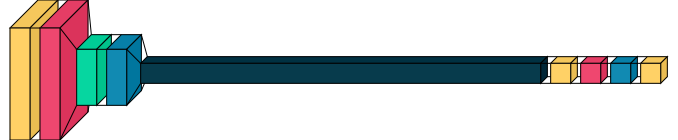

In [16]:
visualkeras.layered_view(modelo)

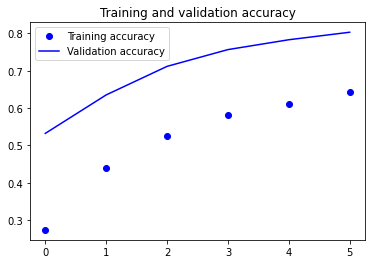

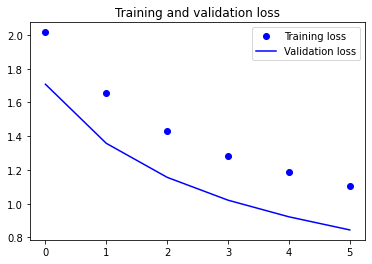

In [13]:
accuracy = entrenamiento.history['accuracy']
val_accuracy = entrenamiento.history['val_accuracy']
loss = entrenamiento.history['loss']
val_loss = entrenamiento.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()